# Intro to Sage

Sage is an open-source (and free) mathematical software system. CoCalc provides a way to use Sage through a web browser, without having to install Sage on your own computer. We will use Sage in this course to explore some Calculus using software tools.

This is an example of a Jupyter Notebook, which allows us to mix text with code segments.  (This notebook uses Sage for the code, but you can also use other software, such as Python.)

To create your own new Jupyter Notebook for using Sage on CoCalc, do the following:

*  Click "New", enter the name for your new notebook, and click the "Jupyter Notebook" button.
*  Click the "Kernel" menu item (in the same row as "File" above), and under "Change Kernel", select the most recent Sage kernel.  (Right now, that is SageMath 8.8.)

Then you can enter cells and evaluate them just like we do here.

## Basic Computations

Let's start with an easy calculation. Below you will see a Sage cell, with `2+2` already entered. Click inside the cell, then hit Shift-Return to evaluate the cell and get the result:

In [0]:
2+2

(You can also use the "Insert" menu above to get a new Sage cell in which to enter your own calculation. Try it out!)

You can do all the usual arithmetic operations in sage:

*  Addition and subtraction are `+` and `-` (of course).
*  Multiplication is an asterisk (`*`):  Two times three is `2*3`
*  Division is a slash (`/`): Twelve divided by three is `12/3`)
*  Exponents use a caret (`^`):  Two cubed is `2^3`

As the above examples show, Sage can be used as a calculator. But Sage is a very good calculator, which knows about all sorts of mathematical functions and constants. To see an example, let's insert a new cell. Then in the cell type `sin(pi/3)` and press `[Shift]-[Enter]` to see a little of what Sage can do.

That's really good! But if you want to see a numerical approximation to the number $\sin(\pi/3)$, you can use the Sage function `n`. You can also use the symbol `_` to refer to the last computation that Sage did. So if the last thing you computed was `sin(pi/3)` above, you can type `n(_)` to find a numerical approximation. (If you have entered something else since then, just type `n(sin(pi/3))` in a new cell.)

If you want more accuracy, you can add the argument digits inside the `n` function, like in this example:

In [6]:
n(sqrt(2), digits = 20)

1.4142135623730950488

Sage is familiar with many functions you know about. A few notes about some special ones:

*  The inverse trig functions are written as `arcsin`, `arctan`, etc.
*  The natural logarithm can be written as `ln` or as `log`. If you want a logarithm to another base, such as base 10, specify the base with the base argument:  `log(x, base=10)`, for example.
*  The natural exponential function, `e^x`, can be written as `exp(x)`.  

(Note that Calculus II deals with the exponential and trigonometric functions.)

## Algebra

Sage can do symbolic algebra, but you must declare any variables you want to use as symbolic, using the `var` function.  Let's declare both `x` and `t` to be symbolic variables:

In [7]:
var("x, t")

(x, t)

Sage can do most of the things that a Math 105 student can do, like the following:

In [8]:
expand((x + 5)*(2*x - 1))

2*x^2 + 9*x - 5

Notice that in Sage, you cannot use multiplication by juxtaposition:  `2x` returns an error.  We must be explicit and write `2*x`.

But Sage *can* make a pretty representation of a result, if you want:

In [9]:
show(_)

2*x^2 + 9*x - 5

In [10]:
factor(6*x^3 + 26*x^2 - 20*x)

2*(3*x - 2)*(x + 5)*x

Note that factoring in general is a hard problem.  Sage will have difficulty with large or complicated polynomials.

In [11]:
solve( x^2 + x  == 6, x)

[x == -3, x == 2]

Sage can also define and use functions:

In [1]:
f(x) = x^2 + 2

In [2]:
f(2)

6

## Plotting

It is easy to plot a function in Sage. Here is an example of plotting the function $f(x) = 3 x^2 + 2 x - 1$ on the interval $[-2, 2]$:

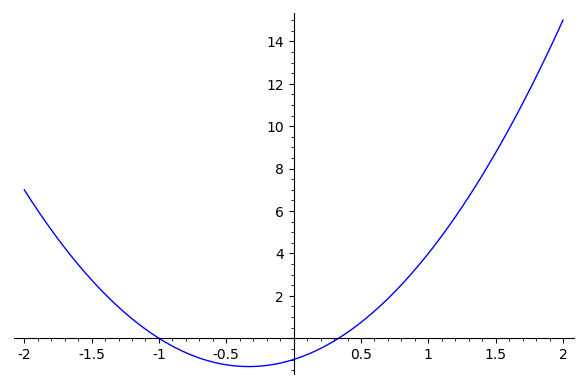

In [4]:
plot(3*x^2+2*x-1, (x, -2, 2))

For now, always use `x` for your plotting variable.  (You can use other variables, but you first have to declare them to be symbolic variables.  We'll discuss this another time.)

Often a graph may not show the kinds of details we would like.  Here is a plot of tangent on [-2, 2]:

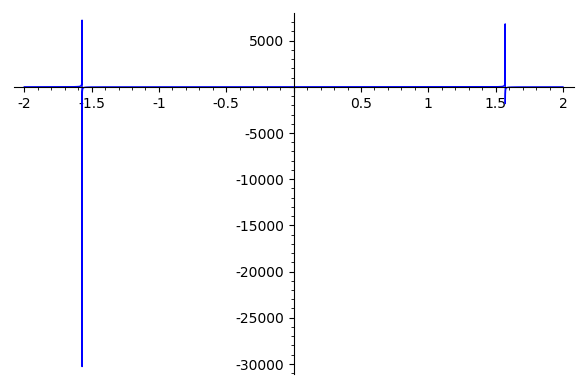

In [5]:
plot(tan(x), (x, -2, 2))

Note the y-axis scale.  We are getting a poor picture because near $\pm \pi/2$, the tangent function has vertical asymptotes, so the function becomes arbitrarily large (and small) near these points.

Software like Sage (and on your graphing calculator) makes a graph by plotting a number of points and "connecting the dots".  Here, some of the sampled points are **huge**, so the graph gets "squished".

In cases like this, we need to make adjustments to the plotting window.  You can do this by setting the optional `ymin` and `ymax` arguments to the plot command.  Below we set `ymin` to -5 and `ymax` to 5:

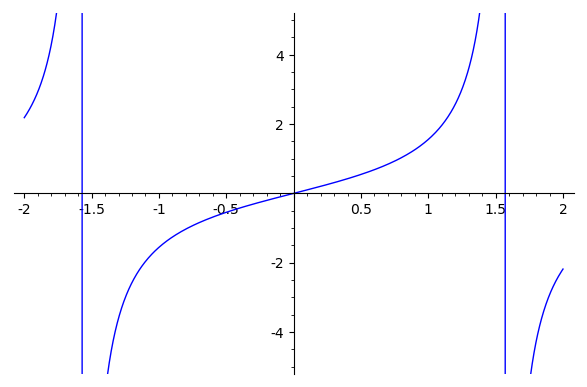

In [6]:
plot(tan(x), (x, -2, 2), ymin = -5, ymax = 5)

Notice in the graph above, it looks a bit like Sage is helpfully trying to draw the asymptotes--but it really isn't.  It's just connecting a really big positive point to a really big negative, and the result looks like a vertical line.

There is another option called `detect_poles` which, when set to `true`, will make Sage try to detect singularities like this and cut them out of the plot.  (You don't have to do this, but it's a neat trick.)

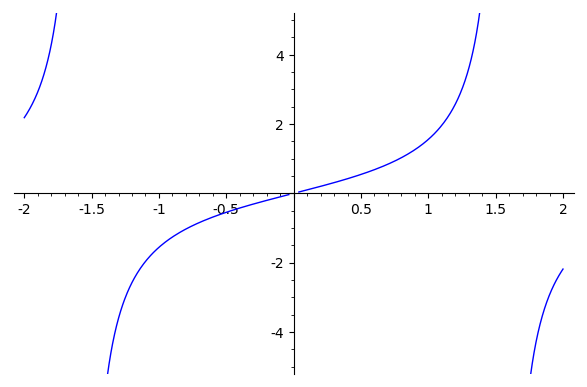

In [7]:
plot(tan(x), (x, -2, 2), ymin = -5, ymax = 5, detect_poles = true)

## Tables of Values

It is often useful to make tables of values.  The simplest way to do this in Sage is to create a *list* of values.  Lists are just sequences of values contained in square brackets.  Here is a list of the first 5 positive integers:

In [1]:
[1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]

We can also create this list using the `range` command, which takes a starting point and the value to stop *before*.  (In other words, we will never reach the second value.)  So for example, we can create the list above using the following:

In [10]:
range(1, 6)

[1, 2, 3, 4, 5]

Note that the list stopped *before* we got to 6!

If we do not specify a starting value, we start at 0:

In [11]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

By itself, this is not so interesting.  However, Sage lets us create lists using a *list comprehension*.  To create one, we write (in square brackets): 
    
*  some expression using a variable, like `i`;
*  "`for i in`";
*  then finally a list to *iterate* over.

The result is a list made up of the expression evaluated at each value of the list to iterate over.

For example, if we want to write the first 3 squares, we can use:

In [1]:
[i^2 for i in [1, 2, 3]]

[1, 4, 9]

Can you write a comprehension that will compute the first ten cubes--*without* having to write the number 1-10 out as a list?  (Hint:  Use a `range` command.)

What if we wanted to make a table of values of the function $f(x) = x^2$ near $x = 2$ to help us evaluate the limit of $f(x)$ as $x \to 2$?

We could start by making a list of input values which get *close to* $2$ in each direction:

In [6]:
f(x) = x^2
x_values = [1.5, 1.8, 1.9, 1.99, 1.999, 2.001, 2.01, 2.1, 2.2, 2.5]

Then evalute the function at those $x$ values:

In [7]:
[f(i) for i in x_values]

[2.25000000000000,
 3.24000000000000,
 3.61000000000000,
 3.96010000000000,
 3.99600100000000,
 4.00400100000000,
 4.04010000000000,
 4.41000000000000,
 4.84000000000000,
 6.25000000000000]

Mild warning: The variable used in a list comprehension gets overwritten, so try not to use a variable you are using for something else, like an `x` you used in the function.  (I just keep using `i`, for "iterate".)
    
It would probably be easier to read if we included the input value as well as the output value.  We can make Sage give us a list of ordered pairs instead.  Sage writes these just like we do:  As two values in parentheses.  So we can type:

In [8]:
[(i, f(i)) for i in x_values]

[(1.50000000000000, 2.25000000000000),
 (1.80000000000000, 3.24000000000000),
 (1.90000000000000, 3.61000000000000),
 (1.99000000000000, 3.96010000000000),
 (1.99900000000000, 3.99600100000000),
 (2.00100000000000, 4.00400100000000),
 (2.01000000000000, 4.04010000000000),
 (2.10000000000000, 4.41000000000000),
 (2.20000000000000, 4.84000000000000),
 (2.50000000000000, 6.25000000000000)]

With a bit of cleverness, we can combine a few steps.  Can you tell what the following comprehension does?

In [10]:
[(2 + (0.1)^i, f(2+(0.1)^i)) for i in range(10)]

[(3.00000000000000, 9.00000000000000),
 (2.10000000000000, 4.41000000000000),
 (2.01000000000000, 4.04010000000000),
 (2.00100000000000, 4.00400100000000),
 (2.00010000000000, 4.00040001000000),
 (2.00001000000000, 4.00004000010000),
 (2.00000100000000, 4.00000400000100),
 (2.00000010000000, 4.00000040000001),
 (2.00000001000000, 4.00000004000000),
 (2.00000000100000, 4.00000000400000)]

Boy, that is a nice pattern!

Obviously the above created a table for a limit from the right.  Can you copy and paste the code to a cell below, then change it to be a limit from the left instead?

## Basic Calculus

In addition to basic algebra, Sage can carry out most computations in Calc I or II.  Below is a short set of examples.

In [5]:
var("x")
derivative(3*exp(x^2)+log(x), x)  # Derivative with respect to x

6*x*e^(x^2) + 1/x

In [6]:
integrate(x^3 + x + 1, x)         # Indefinite integral with respect to x.  (But no "+C"!)

1/4*x^4 + 1/2*x^2 + x

In [7]:
integrate(x, (x, 0, 1))           # Definite integral, with x from 0 to 1

1/2

## 3D Graphing

Here's how you can plot a surface as a function of two variables.  It looks a lot like the `plot` command, except you need to specify the range of both variables involved.  (And make sure they're both symbolic variables!)


In [8]:
var("x, y")
plot3d(sin(x*y), (x, 0, 4), (y, 0, 4))

Graphics3d Object

A useful trick for some surfaces is to plot an implicit surface, where a function is equal to a given value. (In other words, we are plotting a level set for a function of three variables.)

Here we can plot a sphere, by plotting where $x^2 + y^2 + z^2 = 1$:


In [9]:
var("x, y, z")
implicit_plot3d(x^2 + y^2 + z^2, (x, -2, 2), (y, -2, 2), (z, -2, 2), contour = 1)

Graphics3d Object

(The `contour` setting specifies the output value.)

Sage can also plot parametric curves in space using `parametric_plot3d`:

In [10]:
var("t")
parametric_plot3d((3*cos(t), 3*sin(t), t), (t, 0, 6*pi))

Graphics3d Object

## Markdown

In addition to writing code, we often need to explain or document it.  (Look at all the sentences you've read in this Juypyter notebook so far!)

To put text into your notebook, you need to convert a cell from "Code" to "Markdown".  There is a pulldown menu above that you can use to do this.

Once you have a Markdown cell, you can click the "Edit" button next to it, and type in any text you want.  You can also add extra formatting, if you want, using codes like the following:

*  For *italic text*, just put asterisks around the words: `*italic text*`
*  For **bold**, use two stars: `**bold**`
*  You can make headings (like the title of this notebook, or the subsection "Markdown" above) by starting a line with `#` (for first level heading), or `##` for second level, and so on.
*  You can make a bulleted list like this one by starting each line with a star (`*`) followed by two spaces.

There's lots of other Markdown codes, and you can read about them online if you'd like to know more.  Here's a good reference:
https://daringfireball.net/projects/markdown/basics

(It's not really important that you master formatting, but feel free to have fun with it if you'd like.)